In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv('./data/house_price_train.csv')
df_test = pd.read_csv('./data/house_price_train.csv')

In [4]:
uniqueRows = len(set(df_train.Id))
totalRows = len(df_train.Id)
duplicateRows = totalRows - uniqueRows

# Tip: Assert allows you to test simple stuff in your data analysis as you go/sanity checks
assert (duplicateRows==0)

In [5]:
numeric = [col for col in df_test.columns if df_test.dtypes[col] != 'object']
categorical = [col for col in df_test.columns if df_test.dtypes[col] == 'object']
print("\nNumeric columns\n")
print(numeric)
print("\nCategorical columns\n")
print(categorical)


Numeric columns

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplace

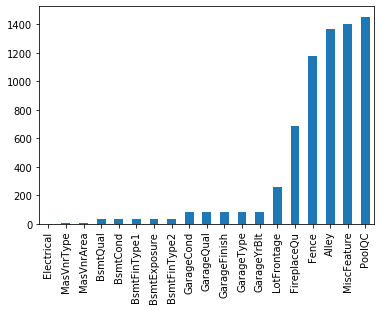

In [6]:
# Finding out the columns that are missing values in the dataset
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

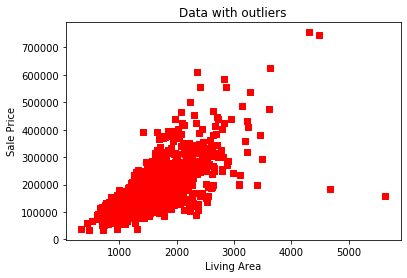

((1460, 81), (1456, 81))

In [7]:

# Looking for outliers
plt.scatter(df_train.GrLivArea, df_train.SalePrice, color='red', marker='s')
plt.title('Data with outliers')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()
# Cleaning the dataset so there are no outliers in the dataset
df_train = df_train[(df_train.GrLivArea<4000) & (df_train.SalePrice<700000)]
#df_test = df_test[:df_train.shape[0]]
df_test.shape, df_train.shape

Text(0, 0.5, 'Sale Price')

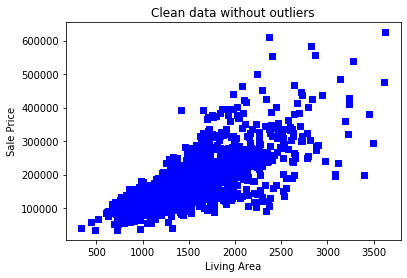

In [8]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice, color='blue', marker='s')
plt.title('Clean data without outliers')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

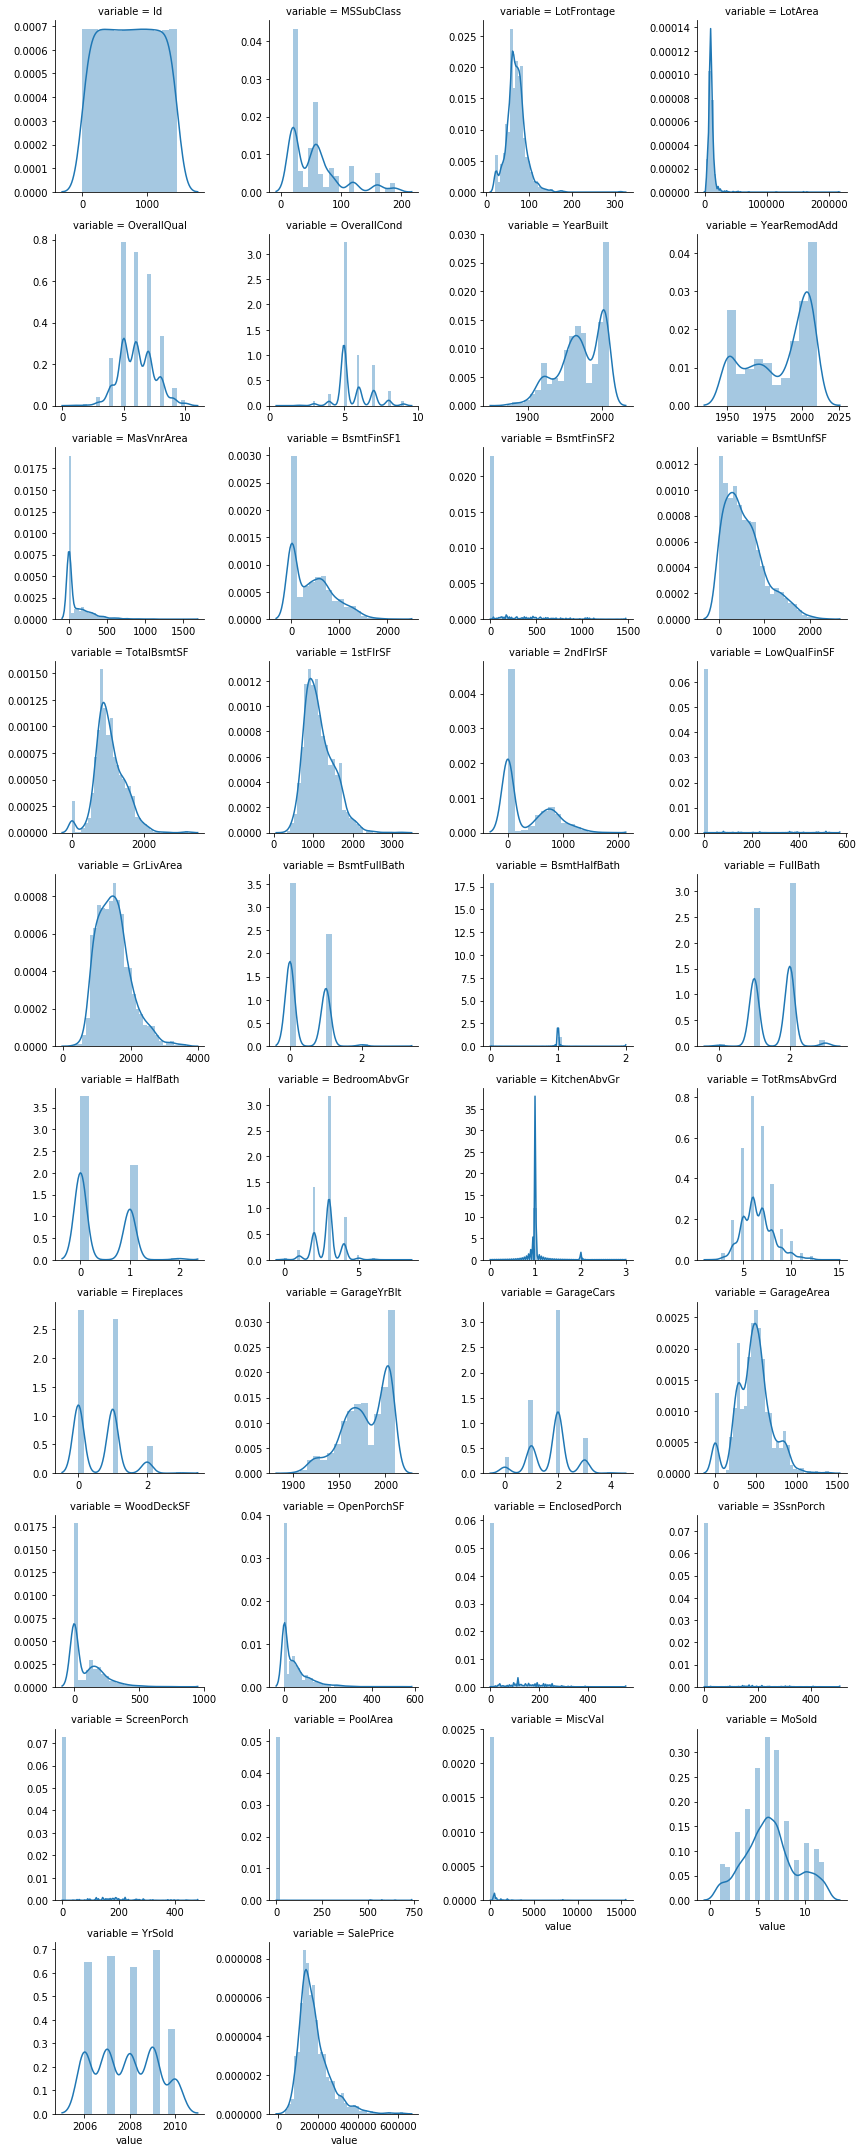

In [9]:
f = pd.melt(df_train, value_vars=numeric)
grid = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.distplot, "value")

In [10]:
df_train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

In [11]:
corr=df_train.corr()["SalePrice"]
corrmat = df_train.corr()
corrmat.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corrmat.SalePrice)

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePr

Text(0, 0.5, 'Number of occurences')

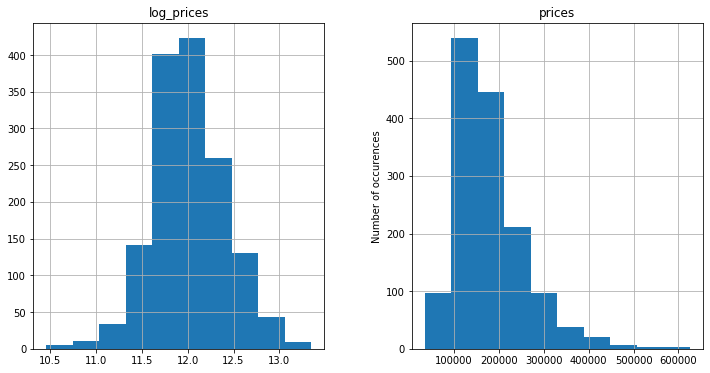

In [12]:
# Increases the size of the histogram to fit both normalized and raw data
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({'log_prices':np.log1p(df_train["SalePrice"]), 'prices': df_train["SalePrice"]})
prices.hist()
plt.ylabel('Number of occurences')

In [14]:
data = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],
                      df_test.loc[:,'MSSubClass':'SaleCondition']))
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

#log transform skewed numeric features:
skewed_feats = df_train[numeric].apply(lambda x: skew(x.dropna())) #compute skewness
print(skewed_feats.loc[skewed_feats.values > 0.75])
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])
display(data[skewed_feats])
df_train.shape, df_test.shape

MSSubClass        1.404916
LotFrontage       1.534509
LotArea          12.574590
MasVnrArea        2.646242
BsmtFinSF2        4.244209
BsmtUnfSF         0.920809
1stFlrSF          0.866187
2ndFlrSF          0.777065
LowQualFinSF      8.989291
GrLivArea         0.834332
BsmtHalfBath      4.124712
KitchenAbvGr      4.476748
WoodDeckSF        1.549672
OpenPorchSF       2.337435
EnclosedPorch     3.081275
3SsnPorch        10.279262
ScreenPorch       4.111400
PoolArea         17.504556
MiscVal          24.418175
dtype: float64


/Users/utkarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log1p
  if __name__ == '__main__':


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,0.000000,5.017280,6.753438,6.751101,0.0,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,0.000000,5.652489,7.141245,0.000000,0.0,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,0.000000,6.075346,6.825460,6.765039,0.0,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,0.000000,6.293419,6.869014,6.629363,0.0,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,0.000000,6.196444,7.044033,6.960348,0.0,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,0.000000,0.000000,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.693147,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,4.454347,9.486152,4.787492,5.099866,6.380123,7.637234,0.000000,0.0,7.637234,0.000000,0.693147,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.262680,4.204693,9.109746,0.000000,0.000000,6.777647,7.080868,7.050123,0.0,7.758333,0.000000,0.693147,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446
1458,3.044522,4.234107,9.181735,0.000000,6.937314,0.000000,6.983790,0.000000,0.0,6.983790,0.000000,0.693147,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000


((1456, 81), (1460, 81))

In [16]:
print("NAs for features in train : " + str(data.isnull().values.sum()))
data = pd.get_dummies(data)
data = data.fillna(data.mean())
print("Remaining NAs for features in train : " + str(data.isnull().values.sum()))

NAs for features in train : 13917
Remaining NAs for features in train : 0


In [411]:
#creating matrices for sklearn:
X_train = data[:df_train.shape[0]]
X_test = data[df_train.shape[0]:]
y = df_train.SalePrice

X_train.shape, X_test.shape, y.shape

((1456, 288), (1460, 288), (1456,))

### Model

In [412]:
def root_mean_squared_error(pred,y):
    return np.sqrt(mean_squared_error(pred,y))

In [413]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [414]:
lr_regressor= LinearRegression()
lr_regressor.fit(X_train,y)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv(lr_regressor).min())

y_train_pred = lr_regressor.predict(X_train)
print('Intercept :',lr_regressor.intercept_)
#print('coefficient :',lr_regressor.coef_)

RMSE on Training set : 0.11187059017273839
Intercept : 9.018416619148004


In [415]:
ridge_model = Ridge()

# Alpha is the regularization parameter
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge_train = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
print(cv_ridge_train)

[0.12271642578930726, 0.12200301869895051, 0.12006098659539559, 0.11690915755963746, 0.1142312642799143, 0.1135012659752515, 0.11330867488223266, 0.11368853139241822, 0.11524475943515688, 0.1170944674789877, 0.1189419766169855]


Text(0, 0.5, 'rmse')

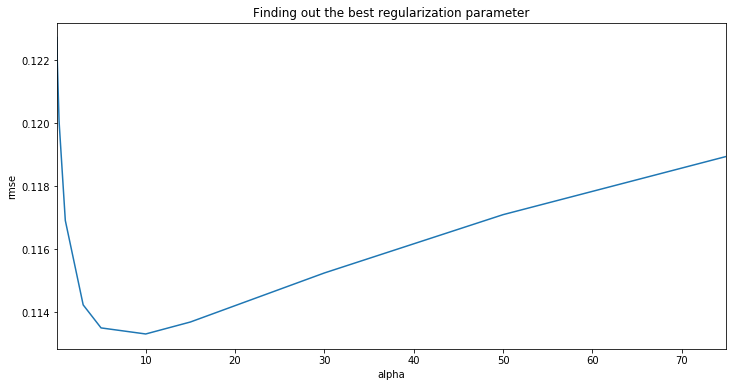

In [416]:

# Plotting the least mean square error on the training data
cv_ridge_train = pd.Series(cv_ridge_train, index = alphas)
cv_ridge_train.plot(title = "Finding out the best regularization parameter")
#cv_ridge_test = pd.Series(cv_ridge_test, index = alphas)
#cv_ridge_test.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")


In [417]:
cv_ridge_train.min()

0.11330867488223266

In [418]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

0.11023664735950574

In [419]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 105 variables and eliminated the other 183 variables


In [420]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

/Users/utkarsh/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/utkarsh/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


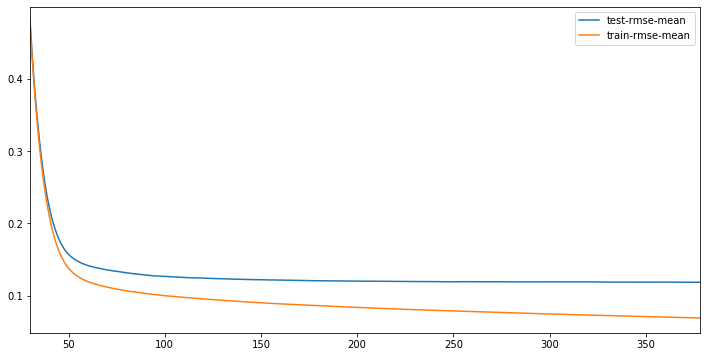

In [421]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [423]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

[20:00:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [424]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

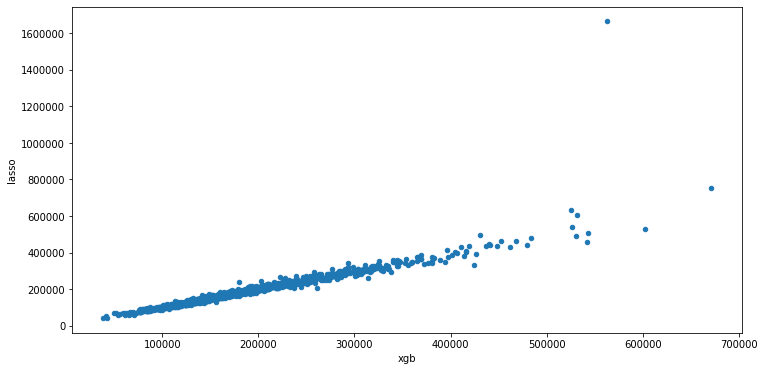

In [425]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [426]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [427]:
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)